<a href="https://colab.research.google.com/github/avijit7074/price_prediction_gurgaon/blob/master/outlier_treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/eda_univariate_performed.csv')

In [3]:
df.head()

property_type                 society     sector  price_in_cr  \
0          flat  maa bhagwati residency   sector 3         0.45   
1          flat            apna enclave   sector 3         0.50   
2          flat  tulsiani easy in homes  sector 35         0.40   
3          flat     smart world orchard  sector 61         1.47   
4          flat        parkwood westend  sector 92         0.70   

   price_per_sq.ft  total_area                            areaWithType  \
0           5000.0       900.0          Carpet area: 900 (83.61 sq.m.)   
1           7692.0       650.0          Carpet area: 650 (60.39 sq.m.)   
2           6722.0       595.0          Carpet area: 595 (55.28 sq.m.)   
3          12250.0      1200.0        Carpet area: 1200 (111.48 sq.m.)   
4           5204.0      1345.0  Super Built up area 1345(124.95 sq.m.)   

   bedrooms  bathrooms balconies  floorNum facing       agePossession  \
0         2          2         1       4.0   West      Relatively New   
1         2          2         1       1.0   West        Old Property   
2         2          2         3      12.0    NaN        New Property   
3         2          2         2       2.0    NaN           Undefined   
4         2          2         3       5.0    NaN  Under Construction   

   super_built_up_area  built_up_area  carpet_area  study_room  servant_room  \
0                  NaN            NaN        900.0           0             0   
1                  NaN            NaN        650.0           0             0   
2                  NaN            NaN        595.0           0             0   
3                  NaN            NaN       1200.0           1             0   
4               1345.0            NaN          NaN           1             0   

   store_room  pooja_room  others  furnishing_type  luxury_score  
0           0           0       0                0            28  
1           0           0       0                1            37  
2           0           0       0                0            36  
3           0           0       0                0            76  
4           0           0       0                0             0

In [4]:
df.shape

(3809, 23)

In [5]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_cr', 'price_per_sq.ft',
       'total_area', 'areaWithType', 'bedrooms', 'bathrooms', 'balconies',
       'floorNum', 'facing', 'agePossession', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study_room', 'servant_room',
       'store_room', 'pooja_room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

**PRICE_IN_CR**

<ipython-input-6-0fd8544a958f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_in_cr'])


<Axes: xlabel='price_in_cr', ylabel='Density'>

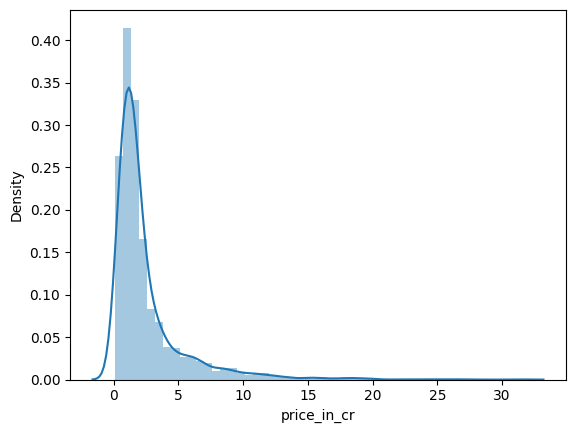

In [6]:
sns.distplot(df['price_in_cr'])

<Axes: >

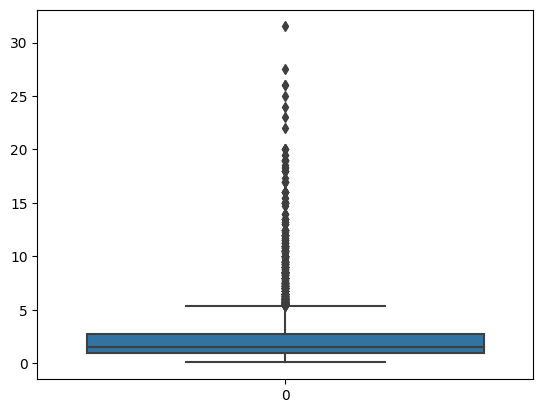

In [7]:
sns.boxplot(df['price_in_cr'])

In [8]:
# Calculate the IQR for the 'price_in_cr' column
Q1 = df['price_in_cr'].quantile(0.25)
Q3 = df['price_in_cr'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price_in_cr'] < lower_bound) | (df['price_in_cr'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price_in_cr'].describe()

num_outliers, outliers_price_stats

(437,
 count    437.000000
 mean       9.176751
 std        4.053794
 min        5.400000
 25%        6.400000
 50%        8.000000
 75%       10.550000
 max       31.500000
 Name: price_in_cr, dtype: float64)

In [9]:
outliers.sort_values('price_in_cr',ascending=False)

property_type                                            society  \
3720         house  arjun marg/ sector- 26 phase- 1/ golf course road   
3489         house                                        independent   
3521         house                                     dlf city plots   
3480         house                                        independent   
3660         house                                   suncity township   
3445         house                             emaar the palm springs   
3646         house                                        independent   
3463         house                                 vipul tatvam villa   
3438         house                                     dlf city plots   
2873         house                             luxury dlf city floors   
3570         house                                        independent   
3584         house                                        independent   
2937         house                                 vipul tatvam villa   
3474         house                                     dlf city plots   
3680         house                                 emaar mgf marbella   
3655         house                                        independent   
3443         house                                        independent   
3479         house                                 vipul tatvam villa   
3562         house                                        independent   
3705         house                                        independent   
3373         house                               adani brahma samsara   
3507         house                                     dlf city plots   
3537         house                                        independent   
3578         house                                 emaar mgf marbella   
3673         house                                 emaar mgf marbella   
3441         house                                     dlf city plots   
3723         house                                        independent   
3508         house                                     dlf city plots   
2917         house                                        independent   
3620         house                                        dlf alameda   
3099         house                                        independent   
3594         house                                    nirvana country   
3685         house                                        independent   
3659         house                                     dlf city plots   
3554         house                                        independent   
3552         house                                        independent   
3610         house                                        independent   
3436         house                             dlf city plots phase 2   
3671         house                                 emaar mgf marbella   
3535         house                                        independent   
3667         house                                        independent   
2183          flat                               central park resorts   
2879         house                                        independent   
2983         house                             unitech deerwood chase   
3623         house                                        independent   
3437         house                                        independent   
2540          flat                                 ambience caitriona   
3606         house                             emaar the palm springs   
3102         house                                        independent   
3654         house                                        independent   
3534         house                                     dlf city plots   
3230         house                                        independent   
3149         house                                        independent   
2909         house                                        indep

On the basis of price_in_cr column there are some genuine outliers and also some data errors as well.

In [10]:
[(outliers['property_type'] == 'flat') | outliers['price_per_sq.ft'] ]

[25      True
 26      True
 248     True
 280     True
 286     True
 317     True
 326     True
 353     True
 358     True
 383     True
 398     True
 403     True
 406     True
 422     True
 425     True
 632     True
 650     True
 651     True
 654     True
 674     True
 754     True
 787     True
 811     True
 906     True
 927     True
 928     True
 930     True
 996     True
 1022    True
 1051    True
 1078    True
 1175    True
 1176    True
 1177    True
 1197    True
 1254    True
 1255    True
 1276    True
 1277    True
 1278    True
 1297    True
 1299    True
 1391    True
 1475    True
 1479    True
 1576    True
 1605    True
 1608    True
 1609    True
 1610    True
 1611    True
 1612    True
 1615    True
 1616    True
 1617    True
 1856    True
 1857    True
 1937    True
 1953    True
 1968    True
 2028    True
 2040    True
 2106    True
 2111    True
 2114    True
 2119    True
 2183    True
 2189    True
 2233    True
 2241    True
 2285    True
 2333 

**PRICR_PER_SQ.FT**

<ipython-input-11-1f6b13e96561>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq.ft'])


<Axes: xlabel='price_per_sq.ft', ylabel='Density'>

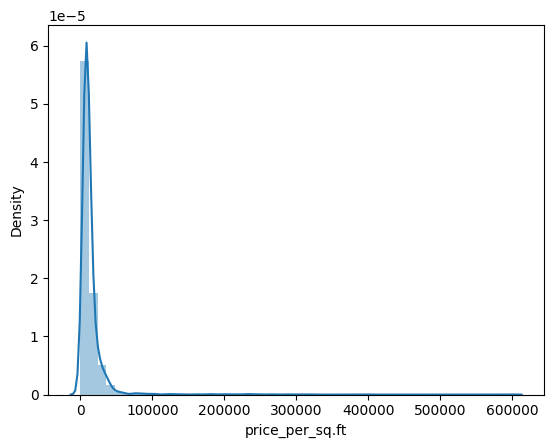

In [11]:
sns.distplot(df['price_per_sq.ft'])

<Axes: >

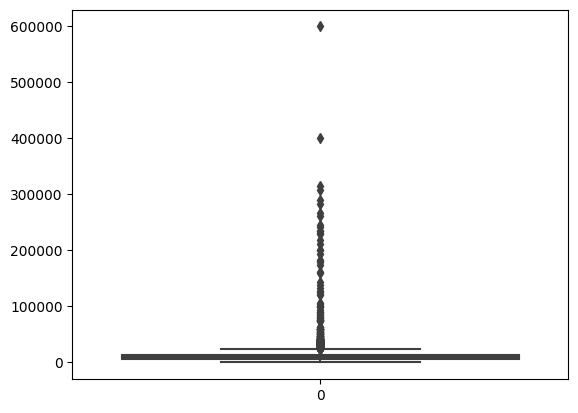

In [12]:
sns.boxplot(df['price_per_sq.ft'])

In [13]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sq.ft'].quantile(0.25)
Q3 = df['price_per_sq.ft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sq.ft'] < lower_bound) | (df['price_per_sq.ft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sq.ft'].describe()

num_outliers, outliers_sqft_stats

(369,
 count       369.000000
 mean      53822.395664
 std       60812.846824
 min       24489.000000
 25%       28233.000000
 50%       33951.000000
 75%       44265.000000
 max      600000.000000
 Name: price_per_sq.ft, dtype: float64)

In [14]:
outliers_sqft['total_area'].sort_values(ascending=True)

3403      45.0
3073      50.0
3062      50.0
3279      50.0
3361      50.0
3166      50.0
3003      54.0
3231      55.0
3271      56.0
3190      57.0
3459      60.0
3393      60.0
2973      61.0
3103      67.0
2971      67.0
2972      70.0
2078      72.0
2974      76.0
3010      80.0
3523      83.0
3203      96.0
3163     100.0
3303     100.0
3385     100.0
3118     100.0
3019     112.0
3772     126.0
3072     130.0
2990     135.0
3227     146.0
3170     150.0
3500     154.0
3226     160.0
3159     160.0
3717     160.0
3556     173.0
3239     175.0
3175     190.0
3058     192.0
3093     200.0
3078     220.0
3737     232.0
3059     240.0
3014     242.0
3485     250.0
3179     250.0
3682     251.0
3154     263.0
3162     270.0
3696     275.0
3245     300.0
3757     300.0
2805     300.0
3104     330.0
3056     347.0
3545     359.0
3465     360.0
3568     360.0
3168     360.0
3445     400.0
3499     402.0
3219     435.0
3482     508.0
2868     539.0
3417     540.0
3725     540.0
3376     5

In [15]:
outliers_sqft['total_area'] = outliers_sqft['total_area'].apply(lambda x: x*9 if x<1000 else x)

<ipython-input-15-4f253c1f1d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['total_area'] = outliers_sqft['total_area'].apply(lambda x: x*9 if x<1000 else x)


In [16]:
outliers_sqft['price_per_sq.ft'].sort_values(ascending=False)

3445    600000.0
3485    400000.0
3175    315789.0
3393    308333.0
3737    290948.0
3682    283333.0
3757    266666.0
3499    261194.0
3239    245398.0
3459    241666.0
3545    235376.0
3717    234375.0
3056    230547.0
3219    229885.0
3226    218750.0
3162    211111.0
3568    201388.0
2540    200000.0
3465    194444.0
3245    183333.0
3302    181818.0
3500    178571.0
3693    173992.0
3556    161849.0
3385    160000.0
3403    144444.0
3003    138888.0
3154    133079.0
3103    126865.0
3168    125000.0
2899    122222.0
3166    120000.0
2868    105751.0
3190    105263.0
2973    100000.0
3326    100000.0
3014     99173.0
3271     98214.0
2972     92857.0
3231     90909.0
3062     90000.0
2974     88157.0
2971     86567.0
3361     84000.0
3480     82540.0
3019     80357.0
3163     80000.0
3772     79365.0
3159     78125.0
3279     76000.0
3303     75000.0
3078     75000.0
2990     74074.0
3179     74000.0
3170     73333.0
3523     63554.0
3281     63492.0
3606     62222.0
3073     60000

In [17]:
outliers_sqft['price_per_sq.ft'] = (outliers_sqft['price_in_cr']*10000000)/(outliers_sqft['total_area'])

<ipython-input-17-ce9d3e58e61f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sq.ft'] = (outliers_sqft['price_in_cr']*10000000)/(outliers_sqft['total_area'])


In [18]:
df.update(outliers_sqft)

<ipython-input-19-1f6b13e96561>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq.ft'])


<Axes: xlabel='price_per_sq.ft', ylabel='Density'>

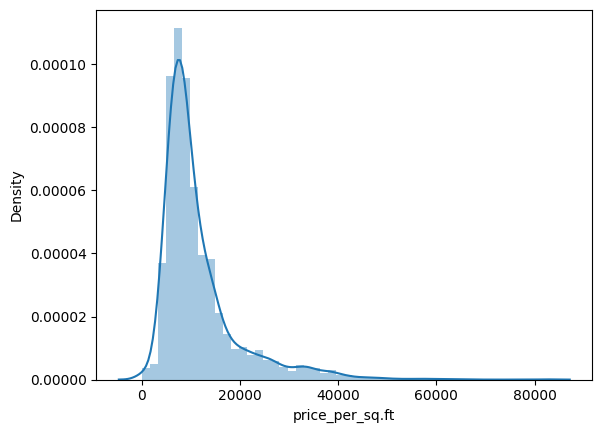

In [19]:
sns.distplot(df['price_per_sq.ft'])

<ipython-input-20-1f6b13e96561>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq.ft'])


<Axes: xlabel='price_per_sq.ft', ylabel='Density'>

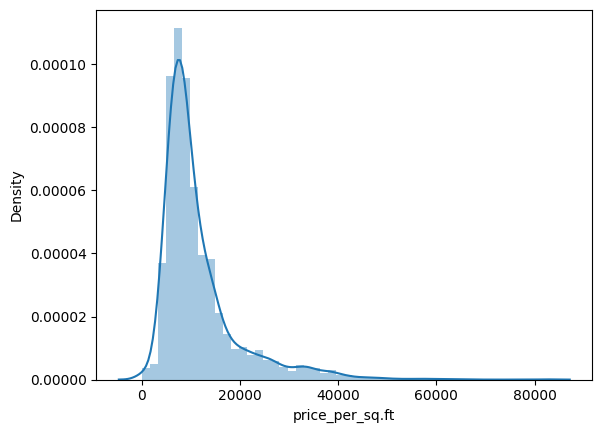

In [20]:
sns.distplot(df['price_per_sq.ft'])

<Axes: xlabel='price_per_sq.ft'>

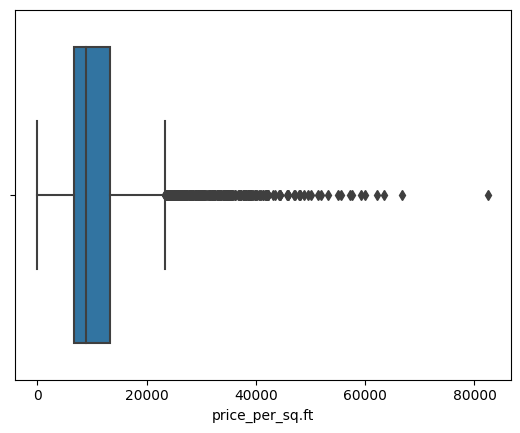

In [21]:
sns.boxplot(x=df['price_per_sq.ft'])

In [22]:
df['price_per_sq.ft']=round(df['price_per_sq.ft'])

In [23]:
outliers_sqft1=outliers_sqft[(outliers_sqft['price_per_sq.ft']>50000) & (outliers_sqft['luxury_score']>1)]

In [24]:
outliers_sqft1['price_per_sq.ft'] = round(outliers_sqft1['price_per_sq.ft'])

<ipython-input-24-6c067a9910c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft1['price_per_sq.ft'] = round(outliers_sqft1['price_per_sq.ft'])


In [25]:
outliers_sqft1.index

Int64Index([3100, 3437, 3445, 3480, 3521, 3606, 3673, 3685, 3712, 3781], dtype='int64')

In [26]:
df.drop([2591, 3281, 3421])

property_type                                            society  \
0             flat                             maa bhagwati residency   
1             flat                                       apna enclave   
2             flat                             tulsiani easy in homes   
3             flat                                smart world orchard   
4             flat                                   parkwood westend   
5             flat                     signature global infinity mall   
6             flat                                         the cocoon   
7             flat                                        ats triumph   
8             flat                                  vatika xpressions   
9             flat                                     raheja revanta   
10            flat                           signature global city 81   
11            flat                                  hcbs sports ville   
12            flat                                 supertech araville   
13            flat                                             godrej   
14            flat                               shree vardhman flora   
15            flat                                         sobha city   
16            flat                                       senate court   
17            flat               shapoorji pallonji joyville gurugram   
18            flat                         central park flower valley   
19            flat                                   smart world gems   
20            flat                                     bestech altura   
21            flat                                   smart world gems   
22            flat                             emaar imperial gardens   
23            flat                            la vida by tata housing   
24            flat                                        the serenas   
25            flat                                     m3m golfestate   
26            flat           central park resort belgravia residences   
27            flat                                      apex builders   
28            flat                                     godrej habitat   
29            flat                                ompee k s residency   
30            flat                                        bhawna cghs   
31            flat                                adani aangan arcade   
32            flat                                    sare green parc   
33            flat                               shree vardhman flora   
34            flat                                     supertech hues   
35            flat                                  chintels paradiso   
36            flat                             breez global hill view   
37            flat                                         ild greens   
38            flat                               ansal sushant lok ci   
39            flat                                   ashiana mulberry   
40            flat                                    godrej meridien   
41            flat                                  mapsko casa bella   
42            flat                                    pooja apartment   
43            flat                              signature global park   
44            flat                               dlf new town heights   
45            flat                                         paras dews   
46            flat                                         godrej air   
47            flat                                     dlf the primus   
48            flat                   emaar mgf emerald floors premier   
49            flat                                   dlf regency park   
50            flat                                 supertech araville   
51            flat                              signature global park   
52            flat                           maxworth city residences   
53            flat                                       deepak

In [27]:
df=df.drop([3100, 3437, 3445, 3480, 3521, 3606, 3673, 3685, 3712, 3781])

<ipython-input-28-1f6b13e96561>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq.ft'])


<Axes: xlabel='price_per_sq.ft', ylabel='Density'>

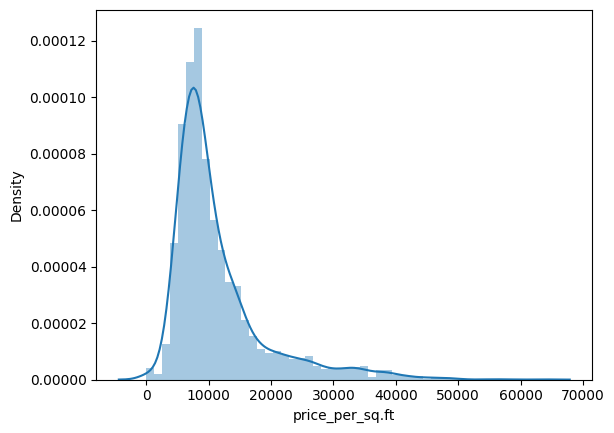

In [28]:
sns.distplot(df['price_per_sq.ft'])

<Axes: >

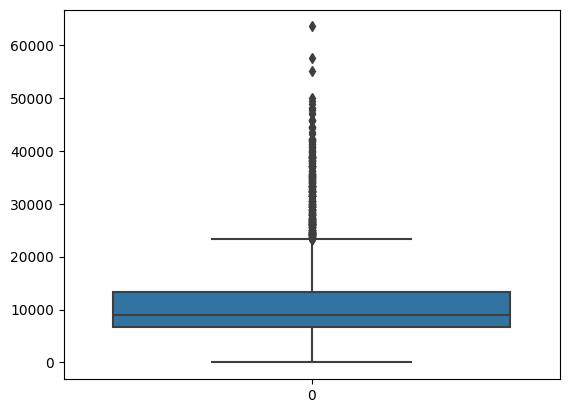

In [29]:
sns.boxplot(df['price_per_sq.ft'])

**TOTAL_AREA**

In [30]:
to_drop=df[df['total_area'] >= 100000.0].index

In [31]:
df=df.drop(to_drop)

<ipython-input-32-3a263655674d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_area'])


<Axes: xlabel='total_area', ylabel='Density'>

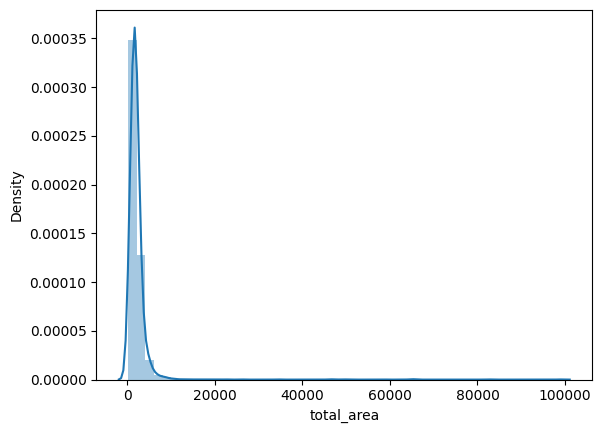

In [32]:
sns.distplot(df['total_area'])

In [33]:
df.drop(df[df['price_per_sq.ft'] < 1000.0].index, inplace=True)

<ipython-input-34-3a263655674d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_area'])


<Axes: xlabel='total_area', ylabel='Density'>

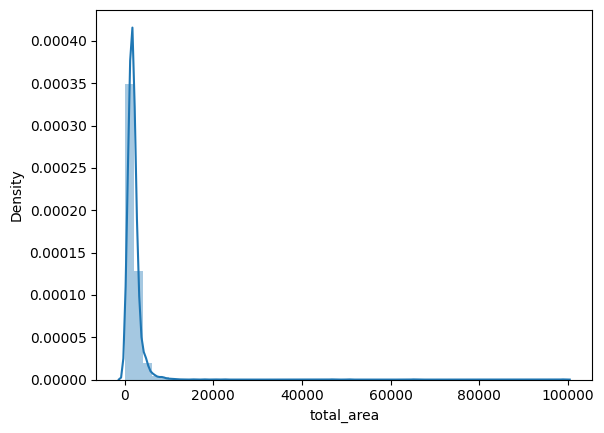

In [34]:
sns.distplot(df['total_area'])

<Axes: >

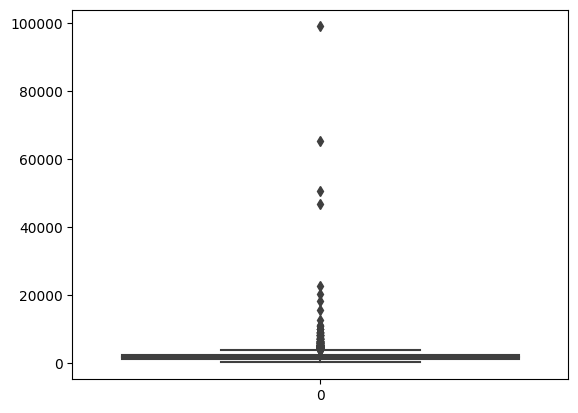

In [35]:
sns.boxplot(df['total_area'])

In [36]:
df[df['total_area'] >= 10000]

property_type                         society     sector  price_in_cr  \
650           flat          krrish provence estate   sector 2         7.50   
1610          flat  the penthouses at the hibiscus  sector 50         8.50   
1616          flat                  m3m golfestate  sector 65        13.20   
2411          flat                      godrej air  sector 85         2.50   
2722          flat                     godrej icon  sector 88         1.75   
2977         house                     independent  sector 57         6.25   
2984         house            unitech aspen greens  sector 50         6.95   
3120         house                     independent  sector 25         8.00   
3269         house           dlf city plot phase 4  sector 27        13.00   
3423         house                     independent  sector 38         5.50   
3475         house                     independent  sector 25         7.30   
3489         house                     independent  sector 43        27.50   
3536         house                     independent  sector 43         5.50   
3562         house                     independent  sector 26        18.40   
3614         house                     independent  sector 51         5.50   
3705         house                     independent  sector 26        18.25   

      price_per_sq.ft  total_area  \
650            7500.0     10000.0   
1610           8500.0     10000.0   
1616          12000.0     11000.0   
2411           1379.0     18129.0   
2722           1384.0     12645.0   
2977           2778.0     22498.0   
2984           4490.0     15479.0   
3120           8000.0     10000.0   
3269           1992.0     65261.0   
3423           5093.0     10799.0   
3475           1560.0     46795.0   
3489          24366.0     11286.0   
3536           2716.0     20250.0   
3562           1859.0     98978.0   
3614           1087.0     50598.0   
3705          18250.0     10000.0   

                                           areaWithType  bedrooms  bathrooms  \
650             Super Built up area 10000(929.03 sq.m.)       5.0        6.0   
1610                  Carpet area: 10000 (929.03 sq.m.)       4.0        4.0   
1616                 Carpet area: 11000 (1021.93 sq.m.)       4.0        4.0   
2411                 Carpet area: 18122 (1683.59 sq.m.)       4.0        5.0   
2722                               Carpet area: 1175.11       3.0        3.0   
2977  Plot area 3100(2591.99 sq.m.)Built Up area: 26...       9.0        9.0   
2984  Plot area 240(200.67 sq.m.)Built Up area: 2160...       3.0        3.0   
3120                  Carpet area: 10000 (929.03 sq.m.)       3.0        9.0   
3269                  Carpet area: 7250 (6061.92 sq.m.)      10.0       10.0   
3423  Plot area 1200(1003.35 sq.m.)Built Up area: 35...       3.0        3.0   
3475  Plot area 215(179.77 sq.m.)Built Up area: 5800...       9.0        9.0   
3489                       Plot area 1254(1048.5 sq.m.)       6.0        7.0   
3536  Plot area 215(179.77 sq.m.)Built Up area: 2850...       8.0        7.0   
3562  Plot area 502(419.74 sq.m.)Carpet area: 11000 ...       6.0        8.0   
3614  Plot area 5620(4699.04 sq.m.)Built Up area: 82...       8.0        8.0   
3705  Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...       7.0        9.0   

     balconies  floorNum      facing   agePossession  super_built_up_area  \
650         3+      23.0  North-East  Relatively New              10000.0   
1610         3       9.0  South-East  Moderately Old                  NaN   
1616         3      13.0       North  Moderately Old                  NaN   
2411        3+      16.0  North-East       Undefined                  NaN   
2722        3+       6.0         NaN    New Property                  NaN   
2977        3+       3.0  North-East    New Property                  NaN   
2984         1       2.0  North-East  Moderately Old                  NaN   
3120         2       3.0         NaN    New Property                  N

In [37]:
df=df.drop([3614,3536,3489,3475,3423,3269,3120,2977,2722,2411,650,1610,1616])

In [38]:
df=df.drop([3562,2984])

<Axes: >

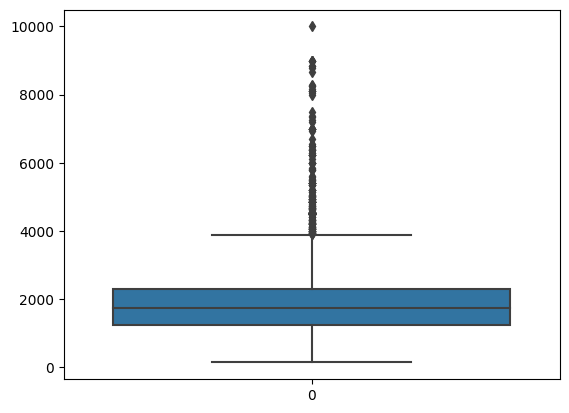

In [39]:
sns.boxplot(df['total_area'])

<ipython-input-40-3a263655674d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_area'])


<Axes: xlabel='total_area', ylabel='Density'>

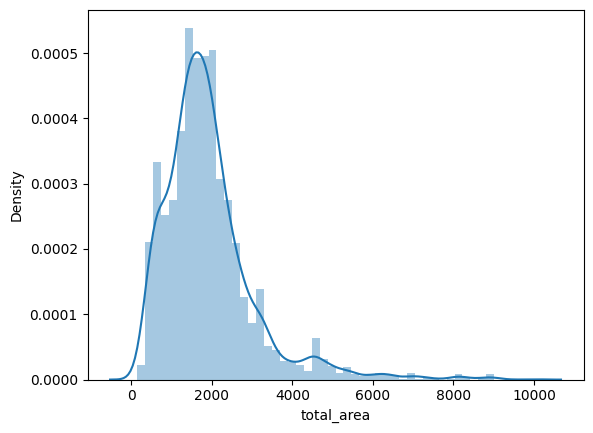

In [40]:
sns.distplot(df['total_area'])

**BEDROOMS**

In [41]:
df['bedrooms'].describe()

count    3765.000000
mean        3.328818
std         1.800115
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: bedrooms, dtype: float64

<ipython-input-42-04ce28449316>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

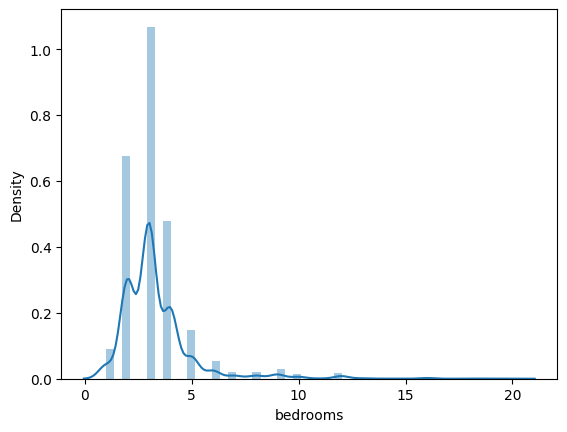

In [42]:
sns.distplot(df['bedrooms'])

<Axes: >

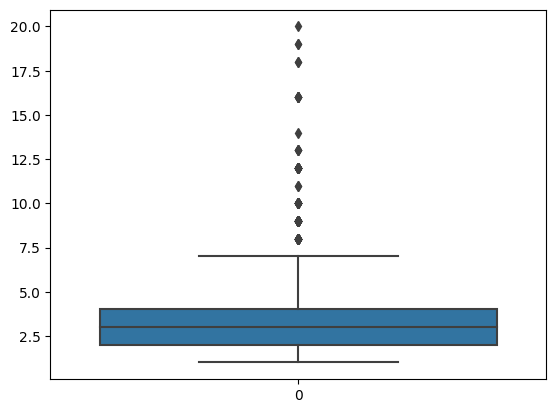

In [43]:
sns.boxplot(df['bedrooms'])

In [44]:
df[df['bedrooms']>7]

property_type                       society      sector  price_in_cr  \
2869         house                   independent   sector 43       2.1000   
2870         house                   independent   sector 43       3.0000   
2871         house                   independent   sector 43       4.5000   
2873         house        luxury dlf city floors   sector 26      20.0000   
2878         house        dlf city plots phase 3   sector 24       5.0000   
2882         house        dlf city plots phase 2   sector 25      10.7500   
2886         house                   independent    sector 9       3.4000   
2890         house                   independent   sector 25       7.6000   
2893         house                   independent    sector 9       3.5000   
2894         house                   independent   sector 40       5.0000   
2898         house                   independent   sector 25       9.0000   
2902         house     floor wise designer kothi   sector 25      13.0000   
2908         house                   independent   sector 55       7.4900   
2909         house                   independent   sector 43      13.5000   
2910         house                   independent   sector 56      11.9500   
2911         house                   independent   sector 56      12.3900   
2916         house                   independent    sector 2       5.6000   
2929         house                   independent   sector 40       9.5000   
2943         house                   independent   sector 56      11.5000   
2978         house                 private house   sector 55       7.0500   
2979         house                   independent   sector 11       4.5000   
2990         house                   independent    sector 2       1.0000   
2995         house                   independent    sector 9       4.5000   
3001         house                   independent   sector 17       3.9300   
3014         house                   independent    sector 8       2.4000   
3016         house                   independent    sector 1       1.1000   
3025         house                   independent    sector 1       0.8000   
3027         house         rajendra park sec 105  sector 105       0.8000   
3028         house                   independent   sector 26       6.0000   
3029         house                      shivpuri    sector 7       2.8000   
3041         house                   independent   sector 56       7.2500   
3046         house                   independent   sector 13       2.2500   
3056         house                   independent   sector 38       8.0000   
3078         house                   independent    sector 6       1.6500   
3081         house                   independent    sector 9       1.2500   
3092         house                   independent    sector 9       0.6000   
3094         house                   independent   sector 12       2.5000   
3102         house                   independent   sector 43      14.0000   
3106         house               anamika enclave   sector 12       6.0000   
3113         house                   independent   sector 56       8.0000   
3117         house                   independent   sector 33       1.3500   
3149         house                   independent   sector 25      13.5000   
3150         house                   independent    sector 2       5.7000   
3154         house                   independent   sector 12       3.5000   
3157         house                   independent    sector 3       1.1000   
3163         house                   independent  sector 104       0.8000   
3175         house                   independent   sector 12       6.0000   
3189         house                   independent   sector 24       3.2000   
3196         house          housing board colony   sector 28       2.1000   
3218         house        laxmi garden sector-11   sector 11       1.5000   
3219         house                   independent   sector 24      10.0000   
3

In [45]:
df=df[df['bedrooms']<=10]

In [46]:
df.shape

(3720, 23)

<ipython-input-47-04ce28449316>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

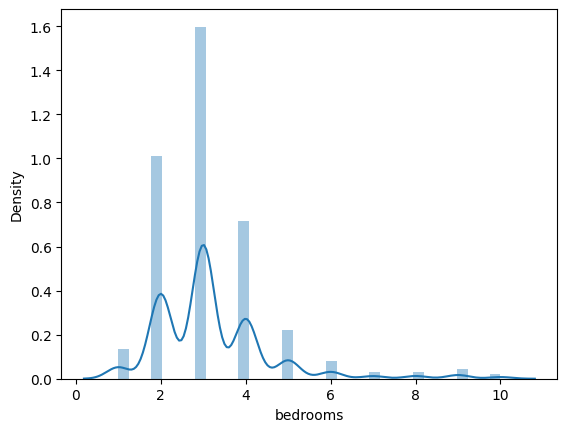

In [47]:
sns.distplot(df['bedrooms'])

<Axes: >

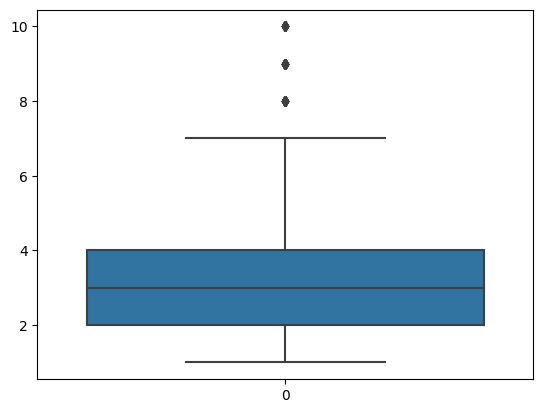

In [48]:
sns.boxplot(df['bedrooms'])

**BATHROOMS**

In [49]:
df['bathrooms'].describe()

count    3720.000000
mean        3.251613
std         1.445663
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathrooms, dtype: float64

<ipython-input-50-c6a870d0f699>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathrooms'])


<Axes: xlabel='bathrooms', ylabel='Density'>

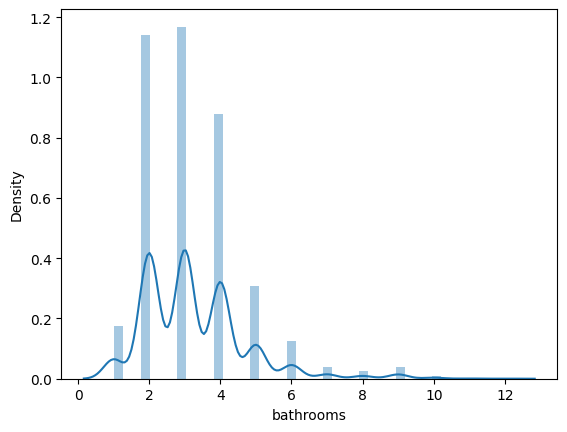

In [50]:
sns.distplot(df['bathrooms'])

<Axes: >

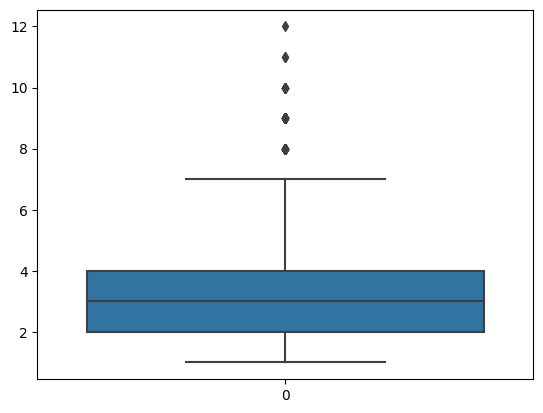

In [51]:
sns.boxplot(df['bathrooms'])

**SUPER_BUILT_UP_AREA**

In [52]:
df['super_built_up_area'].describe()

count    1892.000000
mean     1916.645111
std       742.714430
min        89.000000
25%      1465.000000
50%      1828.000000
75%      2215.000000
max      6926.000000
Name: super_built_up_area, dtype: float64

<ipython-input-53-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

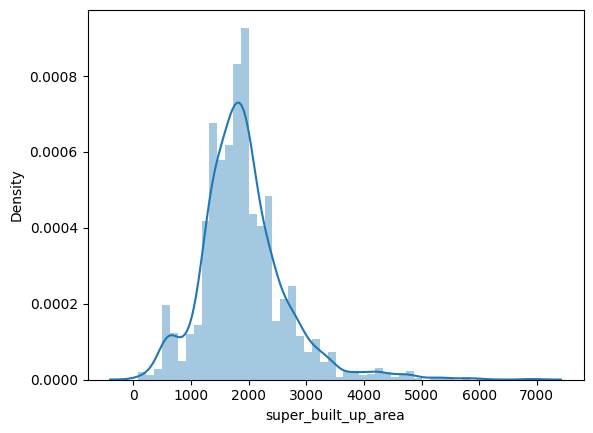

In [53]:
sns.distplot(df['super_built_up_area'])

<Axes: >

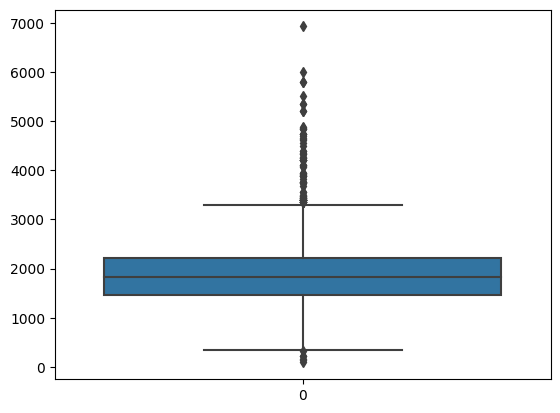

In [54]:
sns.boxplot(df['super_built_up_area'])

In [55]:
df[df['super_built_up_area']>=6000]

property_type                      society     sector  price_in_cr  \
1051          flat           vashist properties   sector 2          7.0   
1522          flat  bestech park view grand spa  sector 81          4.7   

      price_per_sq.ft  total_area                            areaWithType  \
1051          11000.0      6364.0  Super Built up area 6000(557.42 sq.m.)   
1522           6786.0      6926.0  Super Built up area 6926(643.45 sq.m.)   

      bedrooms  bathrooms balconies  floorNum      facing   agePossession  \
1051       4.0        4.0        3+       6.0  South-West  Relatively New   
1522       4.0        4.0        3+      19.0       North  Relatively New   

      super_built_up_area  built_up_area  carpet_area  study_room  \
1051               6000.0            NaN          NaN         0.0   
1522               6926.0            NaN          NaN         0.0   

      servant_room  store_room  pooja_room  others  furnishing_type  \
1051           1.0         0.0         0.0     0.0              0.0   
1522           1.0         0.0         0.0     0.0              1.0   

      luxury_score  
1051          52.0  
1522         140.0

**BUILT_UP_AREA**

In [56]:
df['built_up_area'].describe()

count    1715.000000
mean     1878.329813
std      1366.542459
min        14.000000
25%      1050.000000
50%      1615.000000
75%      2343.000000
max      9500.000000
Name: built_up_area, dtype: float64

<ipython-input-57-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

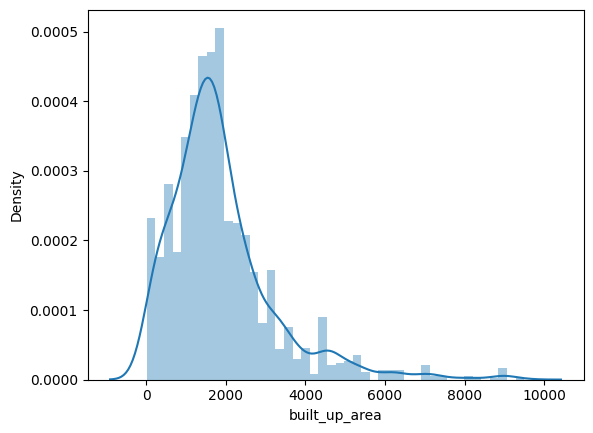

In [57]:
sns.distplot(df['built_up_area'])

<Axes: >

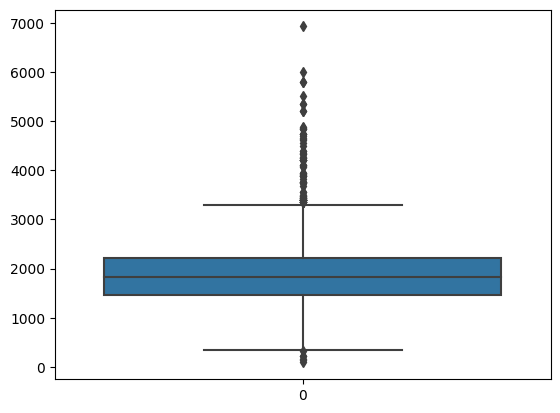

In [58]:
sns.boxplot(df['super_built_up_area'])

In [59]:
df[df['built_up_area']>6000]

property_type                                            society  \
2918         house                                experion windchants   
2925         house                             puri diplomatic greens   
2937         house                                 vipul tatvam villa   
2966         house                international city by sobha phase 1   
2967         house                international city by sobha phase 1   
3106         house                                    anamika enclave   
3113         house                                        independent   
3149         house                                        independent   
3300         house                                         sobha city   
3306         house                                        independent   
3356         house                                        independent   
3373         house                               adani brahma samsara   
3435         house                                    nirvana country   
3448         house                                experion windchants   
3455         house                international city by sobha phase 2   
3469         house                                      tata primanti   
3479         house                                 vipul tatvam villa   
3535         house                                        independent   
3583         house                                experion windchants   
3584         house                                        independent   
3595         house                international city by sobha phase 1   
3600         house                international city by sobha phase 2   
3620         house                                        dlf alameda   
3621         house                            ansal sushant lok plots   
3637         house                         unitech palms south city 1   
3646         house                                        independent   
3671         house                                 emaar mgf marbella   
3676         house                           unitech uniworld resorts   
3690         house                                      tata primanti   
3697         house                international city by sobha phase 1   
3720         house  arjun marg/ sector- 26 phase- 1/ golf course road   
3749         house                                        independent   
3764         house                international city by sobha phase 1   

          sector  price_in_cr  price_per_sq.ft  total_area  \
2918  sector 112         7.99          12519.0      6382.0   
2925  sector 111         9.00          11250.0      8000.0   
2937   sector 48        19.50          22222.0      8775.0   
2966  sector 109         6.30           9000.0      7000.0   
2967  sector 109        12.00          20000.0      6000.0   
3106   sector 12         6.00          14492.0      4140.0   
3113   sector 56         8.00           9654.0      8287.0   
3149   sector 25        13.50          19286.0      7000.0   
3300  sector 109        10.50          14323.0      7331.0   
3306   sector 39         7.00          10000.0      7000.0   
3356   sector 38         6.25           6944.0      9001.0   
3373   sector 60        18.02          28200.0      6390.0   
3435   sector 50        10.00          14285.0      7000.0   
3448  sector 112         7.46          10260.0      7271.0   
3455  sector 109         7.00          11240.0      6228.0   
3469   sector 72         8.50          13492.0      6300.0   
3479   sector 48        18.50          26429.0      7000.0   
3535   sector 25        15.00          23437.0      6400.0   
3583  sector 112         9.50          23457.0      4050.0   
3584    sector 2        19.50          27083.0      7200.0   
3595  sector 109         6.00           9634.0      6228.0   
3600  sector 109         6.25          10035.0      6228.0   
3620   sector 73        17.00          35109.0      4842.0   
3621   sector 43        11.50     

**CARAPET_AREA**

In [60]:
df['carpet_area'].describe()

count     1891.000000
mean      1394.273896
std        883.897342
min         15.000000
25%        823.000000
50%       1270.000000
75%       1760.000000
max      10000.000000
Name: carpet_area, dtype: float64

In [61]:
df=df.drop(3166)

<ipython-input-62-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

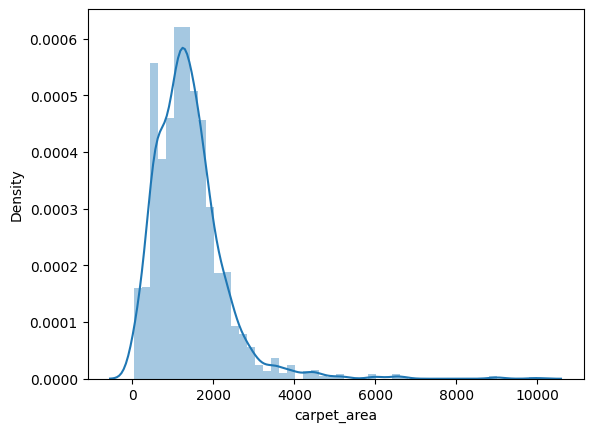

In [62]:
sns.distplot(df['carpet_area'])

<Axes: >

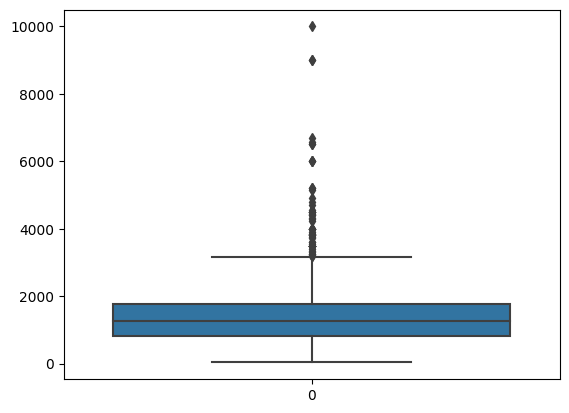

In [63]:
sns.boxplot(df['carpet_area'])

In [64]:
df[df['carpet_area']>8000]

property_type                         society     sector  price_in_cr  \
1612          flat  the penthouses at the hibiscus  sector 50         8.00   
3705         house                     independent  sector 26        18.25   
3749         house                     independent  sector 25        10.00   

      price_per_sq.ft  total_area  \
1612           8888.0      9001.0   
3705          18250.0     10000.0   
3749          37037.0      2700.0   

                                           areaWithType  bedrooms  bathrooms  \
1612                   Carpet area: 9000 (836.13 sq.m.)       4.0        3.0   
3705  Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...       7.0        9.0   
3749  Plot area 2700(250.84 sq.m.)Built Up area: 950...       5.0        5.0   

     balconies  floorNum      facing   agePossession  super_built_up_area  \
1612         3       7.0  South-East  Moderately Old                  NaN   
3705        3+       4.0        East  Relatively New                  NaN   
3749        3+       3.0        East  Moderately Old                  NaN   

      built_up_area  carpet_area  study_room  servant_room  store_room  \
1612            NaN       9000.0         0.0           1.0         0.0   
3705            NaN      10000.0         1.0           1.0         1.0   
3749         9500.0       9000.0         0.0           1.0         0.0   

      pooja_room  others  furnishing_type  luxury_score  
1612         0.0     0.0              0.0          35.0  
3705         1.0     0.0              1.0          77.0  
3749         1.0     0.0              2.0          29.0

<ipython-input-65-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

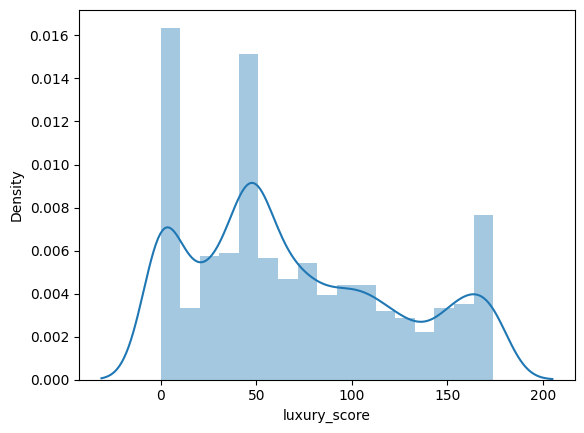

In [65]:
sns.distplot(df['luxury_score'])

**LUXURY_SCORE**

<ipython-input-66-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

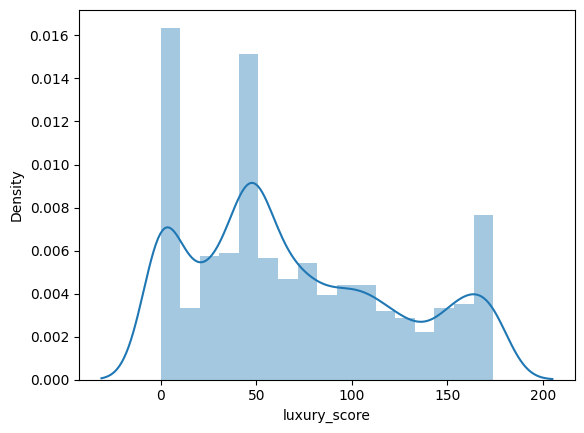

In [66]:
sns.distplot(df['luxury_score'])

<Axes: >

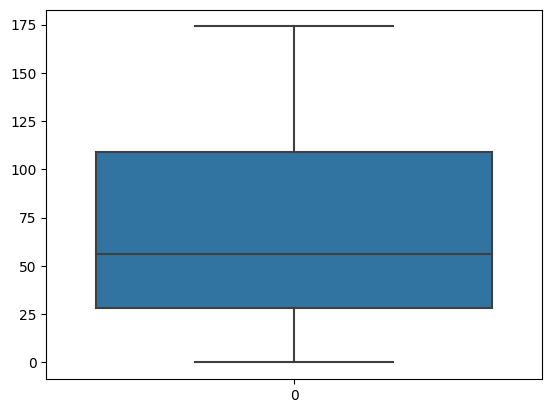

In [67]:
sns.boxplot(df['luxury_score'])

<Axes: >

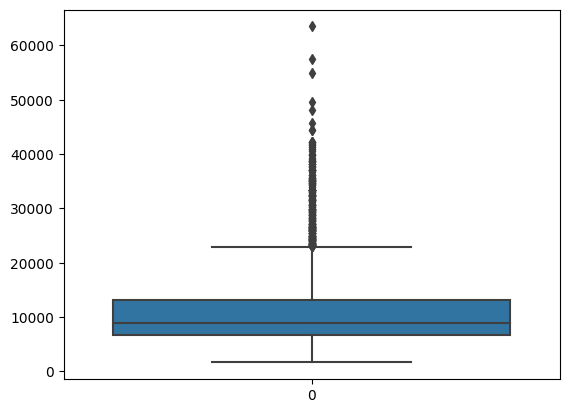

In [68]:
sns.boxplot(df['price_per_sq.ft'])

In [69]:
df[df['price_per_sq.ft'] > 20000]

property_type                                            society  \
26            flat           central park resort belgravia residences   
248           flat                                     tulip monsella   
253           flat                                    emaar digihomes   
280           flat                                      dlf the grove   
305           flat                                 puri the aravallis   
331           flat                                         sobha city   
406           flat                               central park resorts   
425           flat                                          la lagune   
427           flat                                       m3m latitude   
450           flat                                 ambience creacions   
614           flat                           emaar mgf emerald estate   
632           flat                                 ambience creacions   
633           flat                                     m3m golfestate   
651           flat                                      dlf the crest   
734           flat                                       dlf the icon   
740           flat                                ireo the grand arch   
930           flat                                     dlf park place   
1022          flat                                       dlf the icon   
1031          flat                                     dlf park place   
1041          flat                           emaar mgf emerald estate   
1276          flat                                     dlf park place   
1277          flat                                    dlf the belaire   
1278          flat                            suncity platinum towers   
1297          flat                                    dlf the belaire   
1475          flat                                     vipul belmonte   
1476          flat                                     dlf park place   
1477          flat                                     dlf park place   
1478          flat                               central park resorts   
1479          flat                               central park resorts   
1583          flat                                         ireo skyon   
1608          flat                            suncity platinum towers   
1609          flat                            suncity platinum towers   
1856          flat                                      pioneer araya   
1962          flat                                experion windchants   
2028          flat                                           dlf icon   
2114          flat                                      dlf the grove   
2130          flat               shapoorji pallonji joyville gurugram   
2174          flat                        adani brahma samsara vilasa   
2183          flat                               central park resorts   
2241          flat                                     dlf the arbour   
2328          flat                                        birla navya   
2342          flat                                     tulip monsella   
2370          flat                                        birla navya   
2471          flat                                 dlf royalton tower   
2529          flat                         central park flower valley   
2540          flat                                 ambience caitriona   
2562          flat                                 dlf royalton tower   
2588          flat                                 dlf royalton tower   
2591          flat                                     unitech vistas   
2764          flat                                     vipul belmonte   
2767          flat                                smart world orchard   
2866          flat                                      dlf the crest   
2867         house                                   bptp visionnaire   
2872         house                                 emaar mgf ma

In [70]:
x = df[df['price_per_sq.ft'] <= 20000]
(x['total_area']/x['bedrooms']).quantile(0.02)

170.44

In [71]:
area_room_ratio=(x['total_area']/x['bedrooms']).quantile(0.05)
area_room_ratio

244.5

In [72]:
df[(df['total_area']/df['bedrooms'])<171]

property_type                              society      sector  \
2712          flat                       tulip monsella   sector 53   
2883         house                          independent   sector 38   
2990         house                          independent    sector 2   
3004         house                          independent    sector 7   
3006         house                            prem kunj   sector 38   
3009         house                          independent  sector 105   
3011         house                          independent    sector 3   
3025         house                          independent    sector 1   
3027         house                rajendra park sec 105  sector 105   
3035         house                          independent   sector 12   
3036         house                              my home  sector 110   
3045         house                rajendra park gurgaon  sector 105   
3049         house                          independent    sector 8   
3053         house                          independent  sector 106   
3062         house                          independent   sector 11   
3063         house                          independent   sector 34   
3066         house                          independent    sector 9   
3067         house                      bhawani enclave   sector 67   
3068         house                          independent  sector 105   
3073         house                          independent  sector 104   
3077         house                          independent    sector 9   
3079         house                          independent    sector 3   
3081         house                          independent    sector 9   
3092         house                          independent    sector 9   
3103         house                 bhim nagar, sector 6    sector 6   
3107         house                       not applicable    sector 3   
3108         house                          independent    sector 3   
3126         house                          independent   sector 99   
3128         house                          independent    sector 3   
3134         house                          independent  sector 104   
3155         house                          independent    sector 3   
3158         house       surendra homes dayanand colony    sector 6   
3167         house                          independent   sector 38   
3174         house                          independent   sector 28   
3188         house                   jacobpura gurugram   sector 12   
3194         house                          independent    sector 6   
3196         house                 housing board colony   sector 28   
3198         house                          independent   sector 67   
3200         house                          independent   sector 13   
3201         house                       not applicable    sector 3   
3214         house                          independent  sector 105   
3222         house                 shri shyam residency  sector 104   
3223         house                          independent    sector 3   
3225         house                          independent    sector 3   
3242         house                            row house  sector 105   
3250         house                            jacobpura   sector 12   
3252         house                          independent   sector 13   
3253         house                        rattan garden    sector 7   
3255         house                       krishna palace   sector 14   
3259         house                          independent   sector 29   
3262         house                          independent    sector 3   
3263         house                          independent   sector 11   
3265         house                   sai kripa floors 5   sector 11   
3271         house                          independent  sector 105   
3277         house                          independent   sector 99   
3316         house           

In [73]:
to_drop2=df[(df['total_area']/df['bedrooms'])<100].index

In [74]:
df=df.drop(to_drop2)

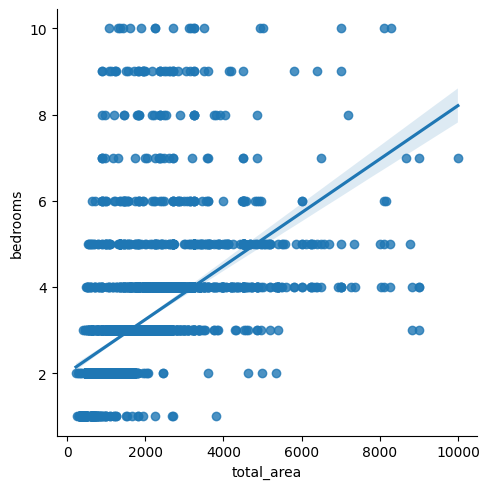

In [75]:
sns.lmplot(data=df, x='total_area', y='bedrooms')

In [76]:
df['area_room_ratio']=df['total_area']/df['bedrooms']

In [77]:
outliers_df = df[(df['area_room_ratio'] < 244) & (df['bedrooms']>3)]

In [78]:
outliers_df['bedrooms'] = round(outliers_df['bedrooms']/outliers_df['floorNum'])

<ipython-input-78-b863207f818a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedrooms'] = round(outliers_df['bedrooms']/outliers_df['floorNum'])


In [79]:
df.update(outliers_df)

In [80]:
df['area_room_ratio'] = df['total_area']/df['bedrooms']

In [81]:
df[(df['area_room_ratio'] < 244) & (df['bedrooms']>4)]

property_type               society      sector  price_in_cr  \
3016         house           independent    sector 1         1.10   
3025         house           independent    sector 1         0.80   
3029         house              shivpuri    sector 7         2.80   
3033         house           independent    sector 7         1.16   
3076         house   om nagar, sector-11   sector 10         0.60   
3078         house           independent    sector 6         1.65   
3094         house           independent   sector 12         2.50   
3103         house  bhim nagar, sector 6    sector 6         0.85   
3165         house           independent    sector 5         1.10   
3198         house           independent   sector 67         0.65   
3214         house           independent  sector 105         1.10   
3277         house           independent   sector 99         0.32   
3322         house           independent   sector 29         0.98   
3337         house           independent    sector 5         0.85   
3363         house           independent   sector 11         3.50   

      price_per_sq.ft  total_area  \
3016           6172.0      1782.0   
3025           6666.0      1200.0   
3029          12444.0      2250.0   
3033          11717.0       990.0   
3076           8333.0       720.0   
3078           8333.0      1980.0   
3094          13888.0      1800.0   
3103          14096.0       603.0   
3165          10000.0      1100.0   
3198           6500.0      1000.0   
3214          12222.0       900.0   
3277           5664.0       565.0   
3322           9074.0      1080.0   
3337           9444.0       900.0   
3363          15555.0      2250.0   

                                           areaWithType  bedrooms  bathrooms  \
3016                       Plot area 1782(165.55 sq.m.)       8.0        8.0   
3025                       Plot area 1200(111.48 sq.m.)       8.0        8.0   
3029                       Plot area 2250(209.03 sq.m.)      10.0        7.0   
3033                     Carpet area: 110 (91.97 sq.m.)       5.0        4.0   
3076                         Plot area 720(66.89 sq.m.)       inf        2.0   
3078                   Built Up area: 220 (20.44 sq.m.)       9.0        9.0   
3094                       Plot area 1800(167.23 sq.m.)       9.0        5.0   
3103                           Plot area 67(6.22 sq.m.)       5.0        2.0   
3165  Built Up area: 1100 (102.19 sq.m.)Carpet area:...       5.0        4.0   
3198                     Carpet area: 1000 (92.9 sq.m.)       6.0        2.0   
3214                     Carpet area: 900 (83.61 sq.m.)       6.0        4.0   
3277                   Built Up area: 565 (52.49 sq.m.)       5.0        1.0   
3322                    Carpet area: 120 (100.34 sq.m.)       9.0        4.0   
3337                     Carpet area: 900 (83.61 sq.m.)       5.0        3.0   
3363                 Built Up area: 2250 (209.03 sq.m.)      10.0        1.0   

     balconies  floorNum      facing   agePossession  super_built_up_area  \
3016        No       1.0         NaN    New Property                  NaN   
3025         2       1.0         NaN  Relatively New                  NaN   
3029         3       1.0         NaN    Old Property                  NaN   
3033         2       1.0  North-East       Undefined                  NaN   
3076         1       0.0        East    Old Property                  NaN   
3078        No       1.0         NaN    New Property                  NaN   
3094         2       1.0  South-East    Old Property                  NaN   
3103         2       1.0         NaN    Old Property                  NaN   
3165         2       1.0        East       Undefined                  NaN   
3198         3       1.0         NaN       Undefined                  NaN   
3214         1       1.0  South-West       Undefined                  NaN   
3277        No       1.0         NaN       Undefined                  NaN   
3322         3       1.0 

In [82]:
df=df[~((df['area_room_ratio'] < 244) & (df['bedrooms']>4))]

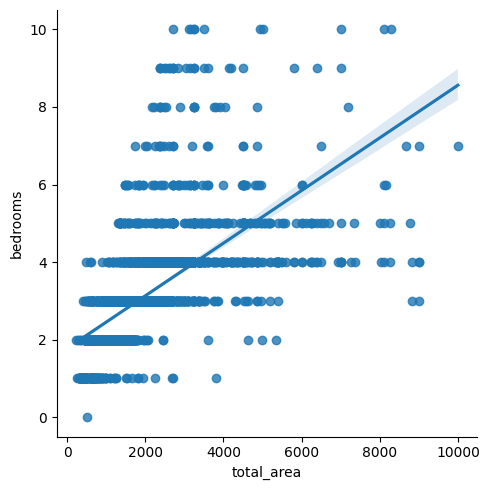

In [83]:
sns.lmplot(data=df, x='total_area', y='bedrooms')

In [84]:
df.to_csv('gurgaon_outlier_treated.csv',index=False)